Загрузите и прочитайте в pandas приложенный датасет. Обратите внимание, что датасет собран «криво», поэтому прежде чем он «правильно» загрузится (рис.1), необходимо его обработать.
---

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data for ML projects/cars_sampled.csv', parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'])

In [ ]:
df.head(2)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,2016-03-26 13:17:00


Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.
---

In [ ]:
df.shape

(50001, 19)

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          50001 non-null  datetime64[ns]
 1   name                 50001 non-null  object        
 2   seller               50001 non-null  object        
 3   offerType            50001 non-null  object        
 4   price                50001 non-null  int64         
 5   abtest               50001 non-null  object        
 6   vehicleType          44813 non-null  object        
 7   yearOfRegistration   50001 non-null  int64         
 8   gearbox              47177 non-null  object        
 9   powerPS              50001 non-null  int64         
 10  model                47243 non-null  object        
 11  kilometer            50001 non-null  int64         
 12  monthOfRegistration  50001 non-null  int64         
 13  fuelType             45498 non-

Поработайте с типами переменных. Все числовые значения переведите в формат int.
---
They already have right types

In [ ]:
for col in df.columns:
  print('\n',col)
  print(df[col].unique()[:5])
  print(df[col].dtypes)


 dateCrawled
['2016-03-30T13:51:00.000000000' '2016-07-03T09:54:00.000000000'
 '2016-01-04T00:57:00.000000000' '2016-03-19T17:50:00.000000000'
 '2016-03-16T14:51:00.000000000']
datetime64[ns]

 name
['Zu_verkaufen' 'Volvo_XC90_2.4D_Summum' 'Volkswagen_Touran'
 'Seat_Ibiza_1.4_16V_Reference'
 'Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_Sitzhzg.']
object

 seller
['private' 'commercial']
object

 offerType
['offer' 'request']
object

 price
[ 4450 13299  3200  4500 18750]
int64

 abtest
['test' 'control']
object

 vehicleType
['limousine' 'suv' 'bus' 'small car' 'station wagon']
object

 yearOfRegistration
[2003 2005 2006 2008 1995]
int64

 gearbox
['manual' 'automatic' nan]
object

 powerPS
[150 163 101  86 185]
int64

 model
['3er' 'xc_reihe' 'touran' 'ibiza' 'passat']
object

 kilometer
[150000  60000 125000   5000  50000]
int64

 monthOfRegistration
[ 3  6 11 12  2]
int64

 fuelType
['diesel' 'petrol' nan 'cng' 'lpg']
object

 brand
['bmw' 'volvo' 'volkswagen' 'seat' 'opel']
objec

Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.
---

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Price column preprocessing

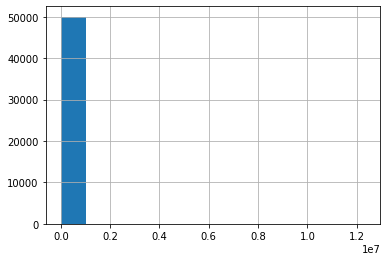

In [ ]:
df.price.hist(bins=12)

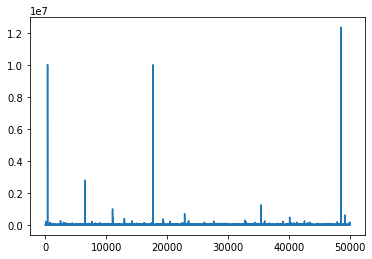

In [ ]:
df.price.plot()

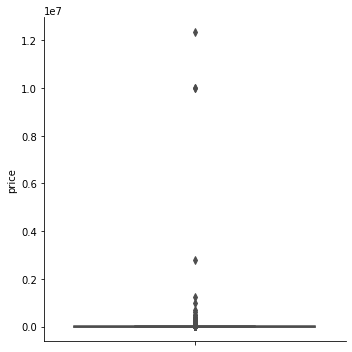

In [ ]:
sns.catplot(
    y='price', 
    data=df,
    palette='bright',
    kind = 'box'
)

In [ ]:
df = df[df.price < df.price.quantile(0.95)]

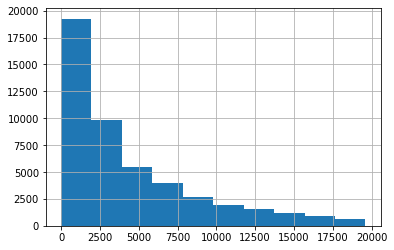

In [ ]:
df.price.hist()

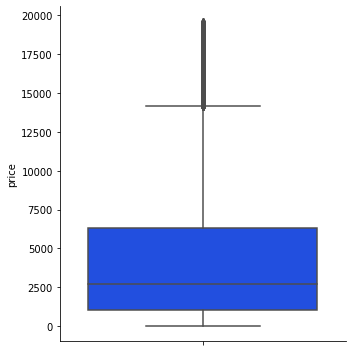

In [ ]:
sns.catplot(
    y='price', 
    data=df,
    palette='bright',
    kind = 'box'
)

In [ ]:
df.price.replace(0, df.price.mean(), inplace=True)
None

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
from scipy.stats import boxcox
df['price_fixed'] = boxcox(df.price, 0.5)
None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


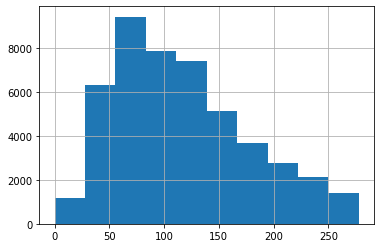

In [ ]:
df.price_fixed.hist()

In [ ]:
df.price_fixed

0        131.416641
1        228.642581
2        111.137085
3        132.164079
4        271.861279
            ...    
49995     93.707889
49996    129.909261
49998    129.909261
49999     18.000000
50000     64.332496
Name: price_fixed, Length: 47498, dtype: float64

Аналогично поработайте и с другими «важными для целевой функции price» параметрами (powerPS, yearOfRegistration, kilometer и т.д). «Важность» докажите через коэффициент корреляции. Сделайте визуализацию.
---

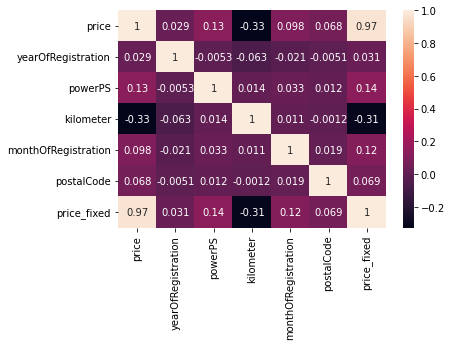

In [ ]:
sns.heatmap(df.corr(), annot=True)

Parameters: kilometer, powerPS, YearOfRegistration, Postalcode, MonthOfRegistrtion

In [ ]:
cols = ['kilometer', 'powerPS', 'yearOfRegistration', 'postalCode', 'monthOfRegistration']

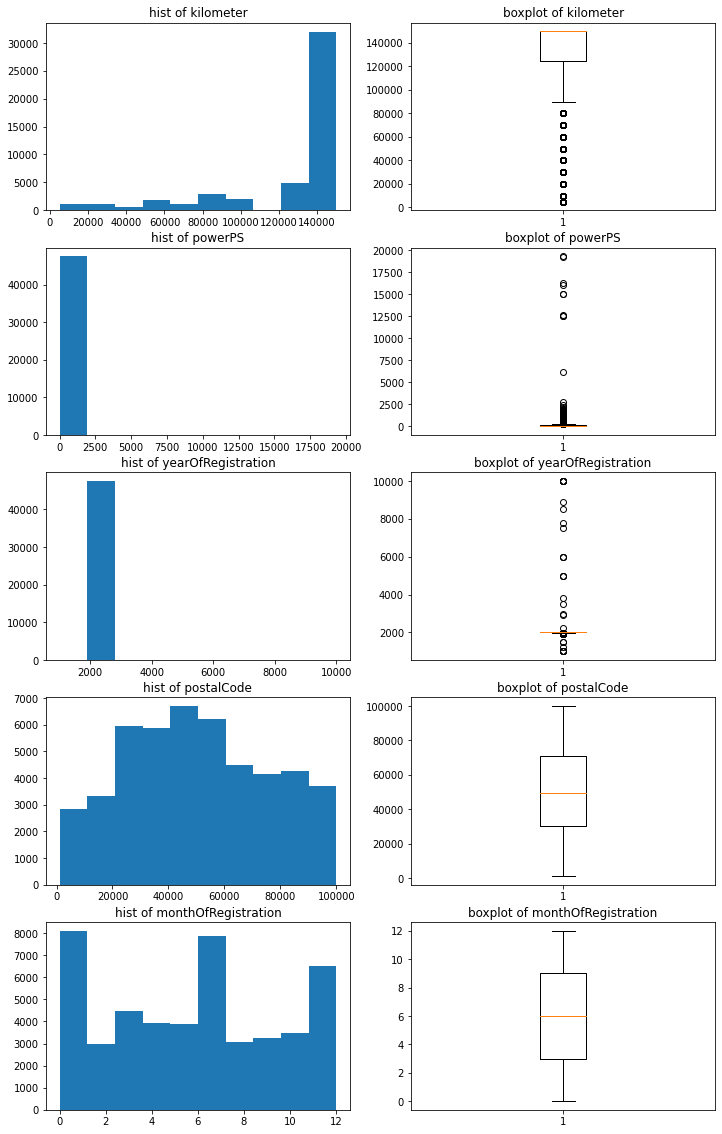

In [ ]:
fig, ax = plt.subplots(5, 2, figsize = (12,20))
for i in range(len(cols)):
  ax[i, 0].hist(df[cols[i]])
  ax[i, 0].set_title('hist of ' + cols[i])
  
  ax[i, 1].boxplot(df[cols[i]])
  ax[i, 1].set_title('boxplot of ' + cols[i])

Kilometer preprocessing
---

In [ ]:
df[df.kilometer == 150_000]['kilometer'].count()

32060

Many huge values means that it`s the limit of kilometers passed by auto, we no need to fix this

In [ ]:
df.kilometer.isna().sum()

0

In [ ]:
df[df.kilometer == 0]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,price_fixed


There is no miss values and zeros

PowerPS column preproccessing
---

In [ ]:
df.powerPS.mean(), df.powerPS.max()

(110.54088593203925, 19312)

In [ ]:
df[df.powerPS == 0]['powerPS'].count()

5510

We had the same problem with price, so let`s fix this like we fixed price

In [ ]:
df = df[df.powerPS < df.powerPS.quantile(0.95)]

In [ ]:
df.powerPS.replace(0, df.powerPS.mean(), inplace=True)
None

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df.powerPS = boxcox(df.powerPS, 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


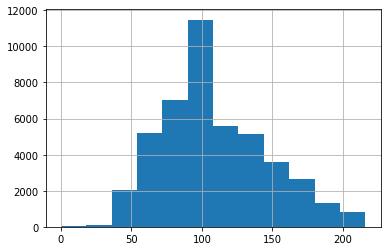

In [ ]:
df.powerPS.hist(bins = 12)
None

Year of Registration column preproccessing
---

In [ ]:
df.yearOfRegistration.mean(), df.yearOfRegistration.max()

(2004.9833077385324, 9999)

Outlier years

In [ ]:
df.yearOfRegistration.sort_values(ascending =False)

40368    9999
47770    9999
14406    9999
18067    9999
6866     9999
         ... 
8027     1000
41464    1000
7150     1000
25449    1000
43043    1000
Name: yearOfRegistration, Length: 44931, dtype: int64

Let`s change all years that does not included in [1900, 2022] interval change for less mean integer by this column

In [ ]:
import math
df[(df.yearOfRegistration < 1900) | (df.yearOfRegistration > 2022)]['yearOfRegistration'].count()

28

In case few numbers of outliers we can easily drop it from dataframe

In [ ]:
df.drop(df[(df.yearOfRegistration < 1900) | (df.yearOfRegistration > 2022)].index,
           inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


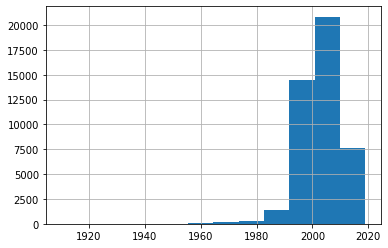

In [ ]:
df.yearOfRegistration.hist(bins = 12)
None

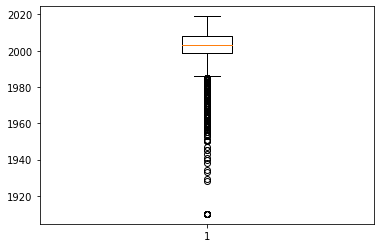

In [ ]:
plt.boxplot(df.yearOfRegistration)
None

Postalcode column doesn`t need preproccessing
---

Month of Registration column preproccessing
---

In [ ]:
df.monthOfRegistration.mean(), df.monthOfRegistration.max(), df.monthOfRegistration.min()

(5.690087521991849, 12, 0)

In [ ]:
df[df.monthOfRegistration == 0]['monthOfRegistration'].count()

4852

It can be possible that car registred with 0 month, so we can`t process this values

Now we processed all numeric columns
---

Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?
---

In [ ]:
cols = ['vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']

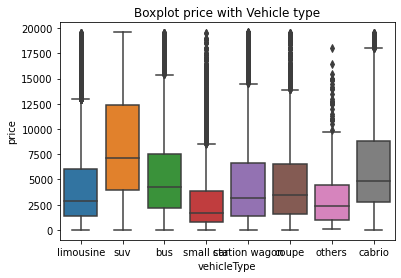

In [ ]:
ax = sns.boxplot(data=df, y="price", x="vehicleType")
ax.set_title('Boxplot price with Vehicle type')
None

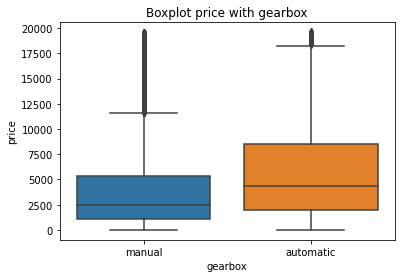

In [ ]:
ax = sns.boxplot(data=df, y="price", x="gearbox")
ax.set_title('Boxplot price with gearbox')
None

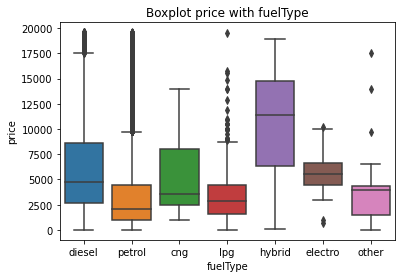

In [ ]:
ax = sns.boxplot(data=df, y="price", x="fuelType")
ax.set_title('Boxplot price with fuelType')
None

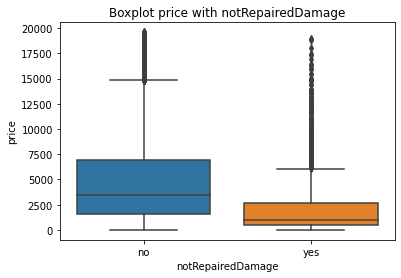

In [ ]:
ax = sns.boxplot(data=df, y="price", x="notRepairedDamage")
ax.set_title('Boxplot price with notRepairedDamage')
None

Few numbers of categorical features isn`t helpful, but we have particulary normal size of dataset, that is why we do not have to drop this features
-
Results of analysis will not be biased

Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения.
---

In [ ]:
df.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5002
yearOfRegistration        0
gearbox                2711
powerPS                   0
model                  2475
kilometer                 0
monthOfRegistration       0
fuelType               4280
brand                     0
notRepairedDamage      9241
dateCreated               0
postalCode                0
lastSeen                  0
price_fixed               0
dtype: int64

Let`s drop notRepairedDamage, vehicleType and fueltype columns

In [ ]:
df.drop(labels = ['vehicleType', 'fuelType', 'notRepairedDamage'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'brand', 'dateCreated', 'postalCode', 'lastSeen',
       'price_fixed'],
      dtype='object')

Now we fill none values in gearbox and model columns

In [ ]:
df.gearbox.unique(), df.gearbox.mode().values[0]

(array(['manual', 'automatic', nan], dtype=object), 'manual')

In [ ]:
df.gearbox.fillna(df.gearbox.mode().values[0], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df.gearbox.isna().sum()

0

In [ ]:
df.model.isna().sum()

2475

In [ ]:
import numpy as np
while df.model.isna().sum() != 0:
  #creates a random permuation of the categorical values
  permutation = np.random.permutation(df.model)

  #erase the empty values
  empty_is = np.where(permutation == "")
  permutation = np.delete(permutation, empty_is)

  #replace all empty values of the dataframe[field]
  end = len(permutation)
  df.model = df.model.apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df.model.isna().sum()

0

Сохраните полученный датасет и выведете его.
---

In [ ]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,brand,dateCreated,postalCode,lastSeen,price_fixed
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450.0,test,2003,manual,149.0,3er,150000,3,bmw,2016-03-30,20257,2016-07-04 04:44:00,131.416641
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299.0,control,2005,manual,162.0,xc_reihe,150000,6,volvo,2016-07-03,88045,2016-03-26 13:17:00,228.642581
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200.0,test,2003,manual,100.0,touran,150000,11,volkswagen,2016-03-31,27449,2016-01-04 08:40:00,111.137085
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500.0,control,2006,manual,85.0,ibiza,60000,12,seat,2016-03-19,34537,2016-07-04 04:44:00,132.164079
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750.0,test,2008,automatic,184.0,xc_reihe,150000,11,volvo,2016-03-16,55270,2016-01-04 23:18:00,271.861279


In [ ]:
 df = df.drop(labels=['price', 'dateCreated', 'lastSeen', 'offerType', 'dateCrawled', 'dateCreated', 'postalCode'], axis = 1)

In [ ]:
df.describe()

,yearOfRegistration,powerPS,kilometer,monthOfRegistration,price_fixed
count,44903.000000,44903.000000,44903.000000,44903.000000,44903.000000
mean,2002.996370,108.803501,128083.090217,5.690088,112.898938
std,7.590296,38.286404,38035.013077,3.730616,58.724603
min,1910.000000,0.000000,5000.000000,0.000000,0.000000
25%,1999.000000,79.000000,125000.000000,3.000000,67.253159
50%,2003.000000,100.000000,150000.000000,6.000000,103.811153
75%,2008.000000,135.000000,150000.000000,9.000000,148.996689
max,2019.000000,216.000000,150000.000000,12.000000,278.000000


Постройте модель регрессии для цены автомобиля. Обучите ее на данных, полученных из исходного датасета с применением разных методов заполнения пропущенных значений. Сделайте вывод об эффективности разных методов.
---

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from category_encoders.ordinal import OrdinalEncoder 
df = OrdinalEncoder().fit_transform(df)

In [ ]:
df.head()

,name,seller,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,brand,price_fixed
0,1,1,1,2003,1,149.0,1,150000,3,1,131.416641
1,2,1,2,2005,1,162.0,2,150000,6,2,228.642581
2,3,1,1,2003,1,100.0,3,150000,11,3,111.137085
3,4,1,2,2006,1,85.0,4,60000,12,4,132.164079
4,5,1,1,2008,2,184.0,2,150000,11,2,271.861279


In [ ]:
y = df.price_fixed
X = df.drop(labels=['price_fixed'], axis = 1)
X = X.drop(labels = ['name', 'seller', 'gearbox'], axis = 1)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MSE:  1935.12
Determnitation coefficient:  0.45


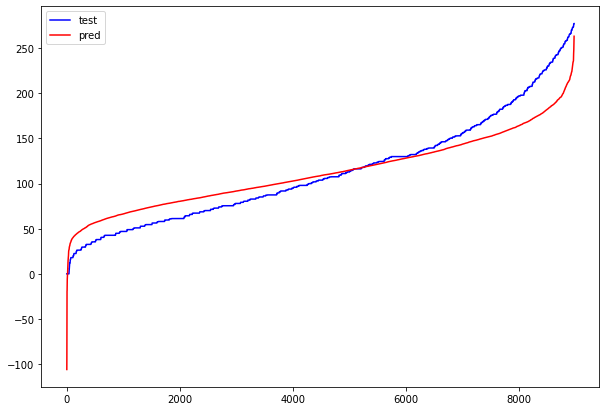

In [ ]:
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MSE: ', round(mean_squared_error(y_test, y_pred), 2))
print('Determnitation coefficient: ', round(r2_score(y_test, y_pred), 2))
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(sorted(y_test), color="b")
ax.plot(sorted(y_pred), color="r")
ax.legend(['test', 'pred'])
None

MSE:  1935.12
Determnitation coefficient:  0.45


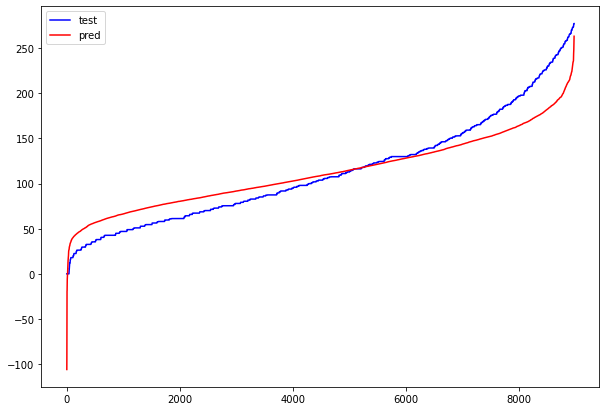

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
print('MSE: ', round(mean_squared_error(y_test, y_pred), 2))
print('Determnitation coefficient: ', round(r2_score(y_test, y_pred), 2))
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(sorted(y_test), color="b")
ax.plot(sorted(y_pred), color="r")
ax.legend(['test', 'pred'])
None

MSE:  1935.12
Determnitation coefficient:  0.45


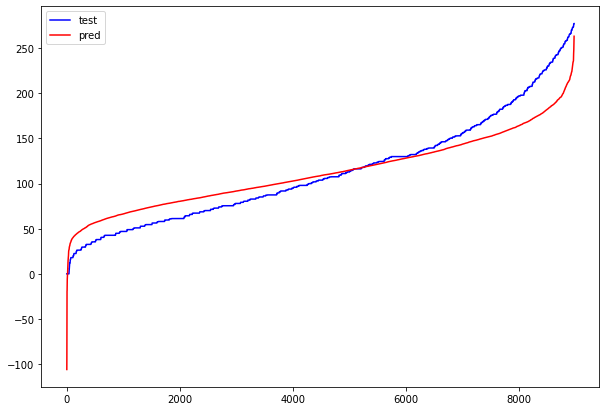

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)
print('MSE: ', round(mean_squared_error(y_test, y_pred), 2))
print('Determnitation coefficient: ', round(r2_score(y_test, y_pred), 2))
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(sorted(y_test), color="b")
ax.plot(sorted(y_pred), color="r")
ax.legend(['test', 'pred'])
None

MSE:  1935.12
Determnitation coefficient:  0.45


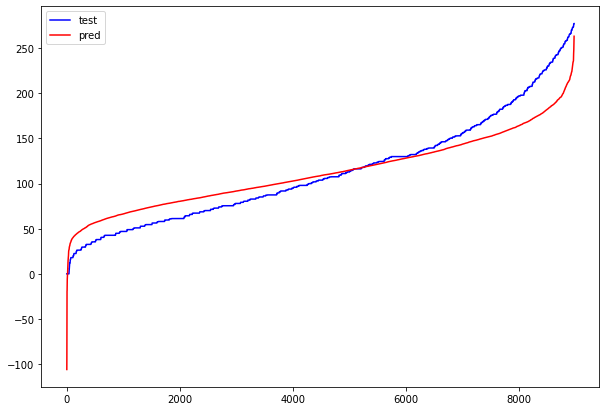

In [ ]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)
print('MSE: ', round(mean_squared_error(y_test, y_pred), 2))
print('Determnitation coefficient: ', round(r2_score(y_test, y_pred), 2))
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(sorted(y_test), color="b")
ax.plot(sorted(y_pred), color="r")
ax.legend(['test', 'pred'])
None

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = Ridge()
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

In [ ]:
# result = search.fit(X, y)
# print('Best Score: %s' % result.best_score_)
# print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)
print('MSE: ', round(mean_squared_error(y_test, y_pred), 2))
print('Determnitation coefficient: ', round(r2_score(y_test, y_pred), 2))
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(sorted(y_test), color="b")
ax.plot(sorted(y_pred), color="r")
ax.legend(['test', 'pred'])
None

NameError: ignored